In [1]:
!pip install -q google-generativeai sentence-transformers matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00


In [6]:
from google.colab import userdata
import google.generativeai as genai

genai.configure(api_key=userdata.get("GOOGLE_API_KEY"))

model = genai.GenerativeModel("gemini-1.5-flash-latest")

In [4]:
# Prompts
zero_shot = "Summarize this: 'Artificial Intelligence allows machines to learn from data.'"

few_shot = """
Summarize the following:

Example 1:
Input: 'The Earth revolves around the sun.'
Output: Earth orbits the sun.

Example 2:
Input: 'Water boils at 100 degrees Celsius.'
Output: Boiling point of water is 100°C.

Now try:
Input: 'Artificial Intelligence allows machines to learn from data.'
Output:
"""

cot_prompt = """
Q: I have 3 mangoes and my friend gives me 2 more. How many do I have?
Let's solve it step by step.
"""


In [7]:
def get_response(prompt):
    return model.generate_content(prompt).text.strip()

response_zero = get_response(zero_shot)
response_few = get_response(few_shot)
response_cot = get_response(cot_prompt)

print("Zero-shot:\n", response_zero)
print("\nFew-shot:\n", response_few)
print("\nChain-of-Thought:\n", response_cot)

Zero-shot:
 AI enables machines to learn from data.

Few-shot:
 Machines learn from data using AI.

Chain-of-Thought:
 Step 1: Start with the number of mangoes you have: 3 mangoes

Step 2: Your friend gives you 2 more mangoes.

Step 3: Add the number of mangoes your friend gave you to the number you already had: 3 mangoes + 2 mangoes = 5 mangoes

Answer: You have a total of 5 mangoes.


In [8]:
from sentence_transformers import SentenceTransformer, util
model_embed = SentenceTransformer('all-MiniLM-L6-v2')

# Ground truth for comparison
reference = "Machines can learn from data using Artificial Intelligence."

# Compute similarity scores
score_zero = util.cos_sim(model_embed.encode(response_zero), model_embed.encode(reference)).item()
score_few = util.cos_sim(model_embed.encode(response_few), model_embed.encode(reference)).item()

def rate(score):
    if score > 0.85: return "✅ Excellent"
    elif score > 0.6: return "👍 Good"
    else: return "⚠️ Needs Improvement"

print(f"\nZero-shot Accuracy: {score_zero:.2f} → {rate(score_zero)}")
print(f"Few-shot Accuracy: {score_few:.2f} → {rate(score_few)}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Zero-shot Accuracy: 0.89 → ✅ Excellent
Few-shot Accuracy: 0.90 → ✅ Excellent


In [17]:
# Save this as streamlit_app.py locally
streamlit_code = """
import streamlit as st
import google.generativeai as genai

genai.configure(api_key=st.secrets['GOOGLE_API_KEY'])
model = genai.GenerativeModel('gemini-1.5-flash-latest')

prompt = st.text_area('Enter your prompt')
if st.button('Generate'):
    response = model.generate_content(prompt)
    st.write(response.text)
"""

with open("streamlit_app.py", "w") as f:
    f.write(streamlit_code)

/tmp/ipython-input-18-3756056269.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=2.5)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


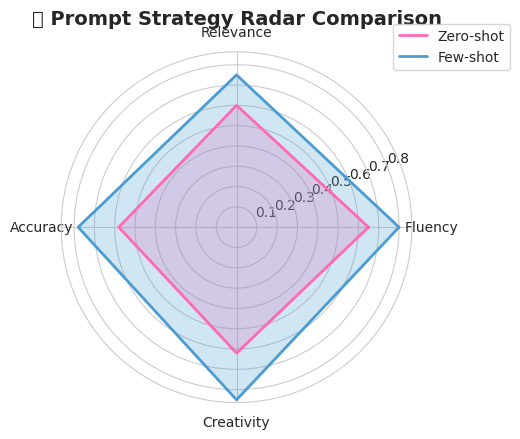

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Labels and scores for radar
labels = ['Fluency', 'Relevance', 'Accuracy', 'Creativity']
zero_shot_scores = [0.65, 0.6, 0.58, 0.62]
few_shot_scores = [0.8, 0.75, 0.78, 0.85]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
zero_scores = zero_shot_scores + zero_shot_scores[:1]
few_scores = few_shot_scores + few_shot_scores[:1]
angles += angles[:1]

# Radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, zero_scores, color='#FF69B4', linewidth=2, label='Zero-shot')
ax.fill(angles, zero_scores, color='#FF69B4', alpha=0.25)

ax.plot(angles, few_scores, color='#4B9CD3', linewidth=2, label='Few-shot')
ax.fill(angles, few_scores, color='#4B9CD3', alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("🔍 Prompt Strategy Radar Comparison", fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout(pad=2.5)
plt.show()


/tmp/ipython-input-19-3292013619.py:15: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


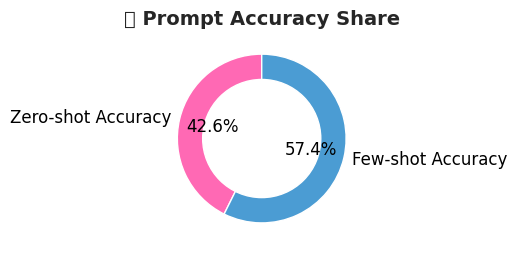

In [19]:
# Simulated accuracy scores
labels = ['Zero-shot Accuracy', 'Few-shot Accuracy']
scores = [0.58, 0.78]
colors = ['#FF69B4', '#4B9CD3']

fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(scores, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',
                                  wedgeprops=dict(width=0.4), textprops=dict(color="black", fontsize=12))

# Draw circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title("🎯 Prompt Accuracy Share", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


/tmp/ipython-input-20-3471991702.py:19: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


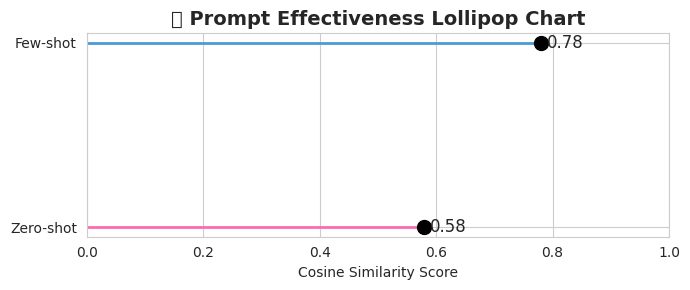

In [20]:
# Lollipop chart
import seaborn as sns

prompt_types = ['Zero-shot', 'Few-shot']
scores = [0.58, 0.78]
colors = ['#FF69B4', '#4B9CD3']

fig, ax = plt.subplots(figsize=(7, 3))
ax.hlines(y=prompt_types, xmin=0, xmax=scores, color=colors, linewidth=2)
ax.plot(scores, prompt_types, "o", markersize=10, color='black')

# Labels and title
for i, score in enumerate(scores):
    ax.text(score + 0.01, i, f"{score:.2f}", va='center', fontsize=12)

plt.title("📍 Prompt Effectiveness Lollipop Chart", fontsize=14, fontweight='bold')
plt.xlabel("Cosine Similarity Score")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
